Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64
Mean Sales: 0.25405433778449654
Median Sales: 0.1904761904761905
Mode Sales: 0.1111111111111111
Standard Deviation of Sales: 0.20478417107280047
Highest Sales Group: 
State           VIC
Group         Women
Unit     159.571429
Sales    159.571429
Name: 23, dtype: object
Lowest Sales Group: 
State          WA
Group       Women
Unit     24.84127
Sales    24.84127
Name: 27, dtype: object
Weekly Report:
                 Sales        Unit       Time
Date                                         
2020-10-04   84.857143   84.857143  Afternoon
2020-10-11  152.777778  152.777778  Afternoon
2020-10-18  150.476190  150.476190  Afternoon
2020-10-25  151.587302  151.587302  Afternoon
2020-11-01  122.460317  122.460317  Afternoon
2020-11-08  113.809524  113.809524  Afternoon
2020-11-15  115.761905  115.761905  Afternoon
2020-11

/var/folders/9l/kd0gvnp51998_xw_1lzf4nf40000gn/T/ipykernel_2620/1631071056.py:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_report = data.resample('M').agg({'Sales': 'sum', 'Unit':'sum','Time': lambda x: x.mode()[0]})#.sum()
/var/folders/9l/kd0gvnp51998_xw_1lzf4nf40000gn/T/ipykernel_2620/1631071056.py:59: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_report = data.resample('Q').agg({'Sales': 'sum', 'Unit':'sum','Time': lambda x: x.mode()[0]})#.sum()


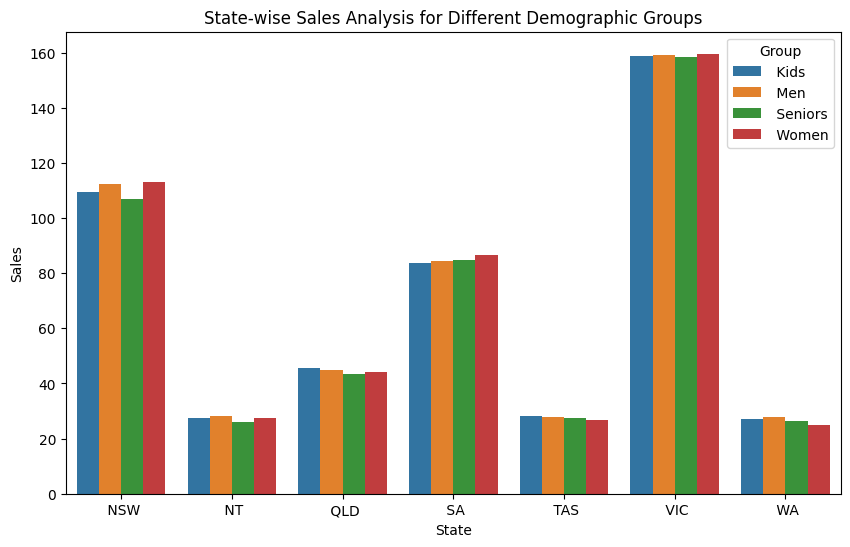

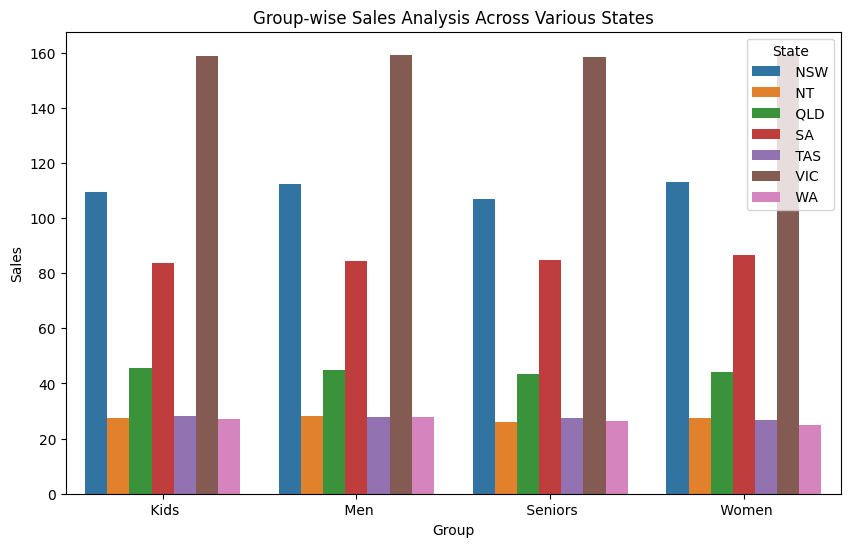

/var/folders/9l/kd0gvnp51998_xw_1lzf4nf40000gn/T/ipykernel_2620/1631071056.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_analysis = data.groupby('Time').agg({


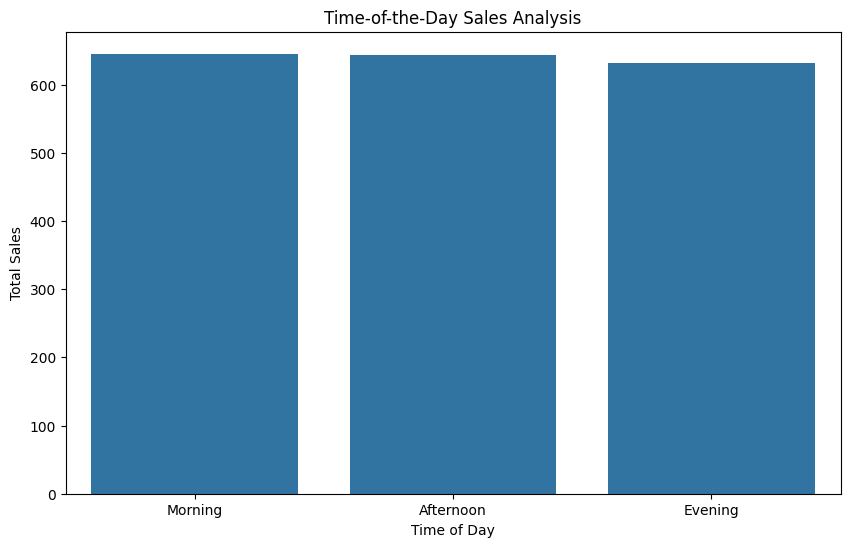

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

# Load the dataset
data = pd.read_csv('AusApparalSales4thQrt2020.csv')
# Ensure 'Time' column values are consistent
data['Time'] = data['Time'].str.strip().str.capitalize()

# print(data.head())

# Data Wrangling
# Inspect the data for missing or incorrect entries
print(data.isna().sum())
print(data.notna().sum())

# Based on the inspection, decide to drop or fill missing values
# For this example, let's assume we drop rows with missing values
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
data[['Unit', 'Sales']] = scaler.fit_transform(data[['Unit', 'Sales']])

# GroupBy function for data chunking or merging
grouped_data = data.groupby(['State', 'Group']).agg({'Unit': 'sum', 'Sales': 'sum'}).reset_index()

# Data Analysis
# Descriptive statistics
mean_sales = data['Sales'].mean()
median_sales = data['Sales'].median()
mode_sales = data['Sales'].mode()[0]
std_sales = data['Sales'].std()

print("===========================================")
print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_sales}")

# Identify groups with highest and lowest sales
highest_sales_group = grouped_data.loc[grouped_data['Sales'].idxmax()]
lowest_sales_group = grouped_data.loc[grouped_data['Sales'].idxmin()]

print("===========================================")
print(f"Highest Sales Group: \n{highest_sales_group}")
print(f"Lowest Sales Group: \n{lowest_sales_group}")

# Generate weekly, monthly, and quarterly reports
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

weekly_report = data.resample('W').agg({'Sales': 'sum', 'Unit':'sum','Time': lambda x: x.mode()[0]})
monthly_report = data.resample('M').agg({'Sales': 'sum', 'Unit':'sum','Time': lambda x: x.mode()[0]})#.sum()
quarterly_report = data.resample('Q').agg({'Sales': 'sum', 'Unit':'sum','Time': lambda x: x.mode()[0]})#.sum()

print("===========================================")
print("Weekly Report:")
print(weekly_report)
print("Monthly Report:")
print(monthly_report)
print("Quarterly Report:")
print(quarterly_report)

# Data Visualization
# State-wise sales analysis for different demographic groups
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=grouped_data)
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.show()

# Group-wise sales analysis across various states
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=grouped_data)
plt.title('Group-wise Sales Analysis Across Various States')
plt.show()

# Time-of-the-day analysis
data['Time'] = pd.Categorical(data['Time'], categories=['Morning', 'Afternoon', 'Evening'], ordered=True)
time_of_day_analysis = data.groupby('Time').agg({
    'Unit': 'sum',
    'Sales': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Sales', data=time_of_day_analysis)
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()


# Recommendations
# Seaborn is chosen for visualization due to its ease of use and ability to create informative statistical graphics.

# Report Generation
# Use JupyterLab Notebook for generating reports with Markdown for explanations and Seaborn for visualizations.